In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
from sklearn import metrics, linear_model, preprocessing, tree
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score
from matplotlib import pyplot as plt

# Read a comma-separated values (csv) file into DataFrame
df = pd.read_csv("data_individual_binary_medal.csv")

## I. Correlations

In [25]:
# Find the correlations between the independent variables and winning a medal 
df_corr = pd.DataFrame(df.corr()["Medal"])
df_corr = df_corr.loc[["Age", "Height", "Weight", "BMI", "Home", "Number"]]
df_corr.sort_values(by=['Medal'], ascending=False)

,Medal
Number,0.290447
Weight,0.065962
BMI,0.059849
Home,0.043536
Height,0.043466
Age,0.010669


# II. Logistic Regression using one independent variable

## II a. Imbalance dataset P(Medal) = ~0.1 vs P(None) = ~0.9 

### II ai. Without sampling 

In [26]:
train, test = train_test_split(df, test_size=0.1, random_state=1)

features = ["Age", "Height", "Weight", "BMI", "Home", "Number"]

df_metrics = pd.DataFrame(columns=['Accuracy_imbalance'])
df_metrics = pd.DataFrame(columns=['Recall_imbalance'])

for feature in features:
    train_feature = pd.DataFrame(train[feature])
    test_feature = pd.DataFrame(test[feature])

    # Train model
    log_model = linear_model.LogisticRegression(solver='lbfgs')
    log_model.fit(train_feature, train['Medal'])

    # To see the score of prediction
    df_metrics.at[feature,"Accuracy_imbalance"] = log_model.score(test_feature, test['Medal']) 

    # Confusion matrix, can be used to calculate the accuracy of the model
    preds = log_model.predict(test_feature)
    print(feature, "\n", pd.crosstab(preds,test['Medal']), "\n")
    
    # To see the recall of prediction
    confusion = pd.crosstab(preds,test['Medal'])
    print(len(confusion.index))
    if len(confusion.index) == 1:
        TP = 0
        FN = 0
        df_metrics.at[feature,"Recall_imbalance"] = 0
    else:
        TP = confusion.at[1,1]
        FN = confusion.at[0,1]
        TN = confusion.at[0,0]
        FP = confusion.at[1,0]
        recall = TP / (TP+FN) 
        precision = TP/(TP+FP)
        df_metrics.at[feature,"Recall_imbalance"] = recall
        df_metrics.at[feature,"Precision_imbalance"] = precision
    

                                      
# To see the probability of not having medal
total_train = train.loc[train.Medal == 0]["Medal"].count() + train.loc[train.Medal == 1]["Medal"].count()
lose_train = train.loc[train.Medal == 0]["Medal"].count()
total_test = test.loc[test.Medal == 0]["Medal"].count() + test.loc[test.Medal == 1]["Medal"].count()
lose_test = test.loc[test.Medal == 0]["Medal"].count()
print("P(Lose)(train): ", lose_train / total_train)
print("P(Lose)(test): ", lose_test / total_test)

# Show the mean accuracy of different models
df_metrics.sort_values(by=['Recall_imbalance'], ascending=False)

Age 
 Medal      0     1
row_0             
0      11439  1167 

1
Height 
 Medal      0     1
row_0             
0      11439  1167 

1
Weight 
 Medal      0     1
row_0             
0      11439  1167 

1
BMI 
 Medal      0     1
row_0             
0      11439  1167 

1
Home 
 Medal      0     1
row_0             
0      11439  1167 

1
Number 
 Medal      0     1
row_0             
0      11367  1143
1         72    24 

2
P(Lose)(train):  0.9119803969960865
P(Lose)(test):  0.907425035697287


,Recall_imbalance,Accuracy_imbalance,Precision_imbalance
Number,0.0205656,0.903617,0.25
Age,0,0.907425,NaN
Height,0,0.907425,NaN
Weight,0,0.907425,NaN
BMI,0,0.907425,NaN
Home,0,0.907425,NaN


### II aii. Under-sampling: sample randomly  in over-represented class (non-medal winning athletes)

In [27]:
train, test = train_test_split(df, test_size=0.1, random_state=1)

train_l = train.loc[df.Medal == 0].sample(frac = 0.1, random_state=1)
train_w = train.loc[df.Medal == 1]
train = pd.concat([train_l, train_w])

features = ["Age", "Height", "Weight", "BMI", "Home", "Number"]


for feature in features:
    train_feature = pd.DataFrame(train[feature])
    test_feature = pd.DataFrame(test[feature])

    # Train model
    log_model = linear_model.LogisticRegression(solver='lbfgs')
    log_model.fit(train_feature, train['Medal'])

    # To see the score of prediction
    df_metrics.at[feature,"Accuracy_underSampling"] = log_model.score(test_feature, test['Medal']) 

    # Confusion matrix, can be used to calculate the accuracy of the model
    preds = log_model.predict(test_feature)
    print(feature, "\n", pd.crosstab(preds,test['Medal']), "\n")
    
    # To see the recall of prediction
    confusion = pd.crosstab(preds,test['Medal'])
    print(len(confusion.index))
    if len(confusion.index) == 1:
        TP = 0
        FN = 0
        df_metrics.at[feature,"Recall_underSampling"] = 0
    else:
        TP = confusion.at[1,1]
        FN = confusion.at[0,1]
        TN = confusion.at[0,0]
        FP = confusion.at[1,0]
        recall = TP / (TP+FN) 
        precision = TP/(TP+FP)
        df_metrics.at[feature,"Recall_underSampling"] = recall
        df_metrics.at[feature,"Precision_underSampling"] = precision
    
                                       
# To see the probability of not having medal
total_train = train.loc[train.Medal == 0]["Medal"].count() + train.loc[train.Medal == 1]["Medal"].count()
lose_train = train.loc[train.Medal == 0]["Medal"].count()
total_test = test.loc[test.Medal == 0]["Medal"].count() + test.loc[test.Medal == 1]["Medal"].count()
lose_test = test.loc[test.Medal == 0]["Medal"].count()
print("P(Lose)(train): ", lose_train / total_train)
print("P(Lose)(test): ", lose_test / total_test)

# Show the mean accuracy of different models
df_metrics.sort_values(by=['Recall_underSampling'], ascending=False)
df_metrics.sort_values(by=['Precision_underSampling'], ascending=False)

Age 
 Medal     0    1
row_0           
0      8938  939
1      2501  228 

2
Height 
 Medal     0    1
row_0           
0      6945  640
1      4494  527 

2
Weight 
 Medal     0    1
row_0           
0      7446  669
1      3993  498 

2
BMI 
 Medal     0    1
row_0           
0      8099  763
1      3340  404 

2
Home 
 Medal      0     1
row_0             
0      10911  1068
1        528    99 

2
Number 
 Medal      0    1
row_0            
0      11045  746
1        394  421 

2
P(Lose)(train):  0.50887719470811
P(Lose)(test):  0.907425035697287


,Recall_imbalance,Accuracy_imbalance,Precision_imbalance,Accuracy_underSampling,Recall_underSampling,Precision_underSampling
Number,0.0205656,0.903617,0.25,0.909567,0.360754,0.516564
Home,0,0.907425,NaN,0.873394,0.084833,0.157895
Weight,0,0.907425,NaN,0.630176,0.426735,0.110888
BMI,0,0.907425,NaN,0.674520,0.346187,0.107906
Height,0,0.907425,NaN,0.592734,0.451585,0.104959
Age,0,0.907425,NaN,0.727114,0.195373,0.083547


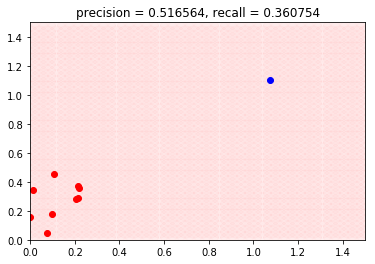

In [28]:
# Show the relationship between recall and precision for under-sampling. Example for feature "Number" 

def plot_model_boundaries(model, xmin=0, xmax=200000, ymin=0, ymax=20, npoints=40):
    xx = np.linspace(xmin, xmax, npoints)
    yy = np.linspace(ymin, ymax, npoints)
    xv, yv = np.meshgrid(xx, yy)
    xv, yv = xv.flatten(), yv.flatten()
    labels = model.predict(np.c_[xv,yv])
    plt.scatter(xv[labels==1],yv[labels==1],color='r', alpha=0.02, marker='o', s=300)
    plt.scatter(xv[labels==0],yv[labels==0],color='b', alpha=0.02, marker='o', s=300)
    plt.ylim([xmin, xmax])
    plt.xlim([ymin, ymax])
    
np.random.seed(1)
precision=0.516564
recall=0.360754
x = np.concatenate([np.zeros((8, 2)), np.zeros((1,2)), np.zeros((1,2))]) + precision*np.random.rand(10,2)
x[-1,0]+=1
x[-1,-1]+=1
y = np.concatenate([np.ones(9), np.zeros(1)])
log_model = linear_model.LogisticRegression(solver='lbfgs')
log_model.fit(x,y)
predicted_labels = log_model.predict(x)
plot_model_boundaries(log_model, xmin=0, xmax=1.5, ymin=0, ymax=1.5)
plt.scatter(x[y==0,0],x[y==0,1], color='b')
plt.scatter(x[y==1,0],x[y==1,1], color='r');
fpr, tpr, thresholds = roc_curve(y, predicted_labels)
plt.title("precision = {}, recall = {}".format(
precision, recall));



### II aiii. Over-sampling: with SMOTE (create synthetic (not duplicate) samples of the minority class)

In [29]:
train, test = train_test_split(df, test_size=0.1, random_state=2)

features = ["Age", "Height", "Weight", "BMI", "Home", "Number"]

for feature in features:
    train_feature = pd.DataFrame(train[feature])
    test_feature = pd.DataFrame(test[feature])
    
    sm = SMOTE(random_state=2)
    train_feature, y_train_res = sm.fit_sample(train_feature, train['Medal'].ravel())

    # Train model
    log_model = linear_model.LogisticRegression(solver='lbfgs')
    log_model.fit(train_feature, y_train_res)

    # To see the score of prediction
    df_metrics.at[feature,"Accuracy_overSampling"] = log_model.score(test_feature, test['Medal'])

    # Confusion matrix, can be used to calculate the accuracy of the model
    preds = log_model.predict(test_feature)
    print(feature, "\n", pd.crosstab(preds,test['Medal']), "\n")
    
    # To see the recall of prediction
    confusion = pd.crosstab(preds,test['Medal'])
    print(len(confusion.index))
    if len(confusion.index) == 1:
        TP = 0
        FN = 0
        df_metrics.at[feature,"Recall_overSampling"] = 0
    else:
        TP = confusion.at[1,1]
        FN = confusion.at[0,1]
        TN = confusion.at[0,0]
        FP = confusion.at[1,0]
        recall = TP / (TP+FN)
        precision = TP/(TP+FP)
        df_metrics.at[feature,"Recall_overSampling"] = recall
        df_metrics.at[feature,"Precision_overSampling"] = precision
                                 
                                      
# To see the probability of not having medal
total_train = train.loc[train.Medal == 0]["Medal"].count() + train.loc[train.Medal == 1]["Medal"].count()
lose_train = train.loc[train.Medal == 0]["Medal"].count()
total_test = test.loc[test.Medal == 0]["Medal"].count() + test.loc[test.Medal == 1]["Medal"].count()
lose_test = test.loc[test.Medal == 0]["Medal"].count()
print("P(Lose)(train): ", lose_train / total_train)
print("P(Lose)(test): ", lose_test / total_test)

# Show the mean accuracy of different models
df_metrics.sort_values(by=['Recall_overSampling'], ascending=False)
df_metrics.sort_values(by=['Precision_overSampling'], ascending=False)

Age 
 Medal     0    1
row_0           
0      6205  523
1      5302  576 

2
Height 
 Medal     0    1
row_0           
0      6203  528
1      5304  571 

2
Weight 
 Medal     0    1
row_0           
0      6587  533
1      4920  566 

2
BMI 
 Medal     0    1
row_0           
0      6991  584
1      4516  515 

2
Home 
 Medal      0     1
row_0             
0      10973  1022
1        534    77 

2
Number 
 Medal      0    1
row_0            
0      11077  652
1        430  447 

2
P(Lose)(train):  0.9113810245742693
P(Lose)(test):  0.9128192924004442


,Recall_imbalance,Accuracy_imbalance,Precision_imbalance,Accuracy_underSampling,Recall_underSampling,Precision_underSampling,Accuracy_overSampling,Recall_overSampling,Precision_overSampling
Number,0.0205656,0.903617,0.25,0.909567,0.360754,0.516564,0.914168,0.406733,0.509692
Home,0,0.907425,NaN,0.873394,0.084833,0.157895,0.876567,0.070064,0.126023
Weight,0,0.907425,NaN,0.630176,0.426735,0.110888,0.567428,0.515014,0.103172
BMI,0,0.907425,NaN,0.674520,0.346187,0.107906,0.595431,0.468608,0.102365
Age,0,0.907425,NaN,0.727114,0.195373,0.083547,0.537918,0.524113,0.097993
Height,0,0.907425,NaN,0.592734,0.451585,0.104959,0.537363,0.519563,0.097191


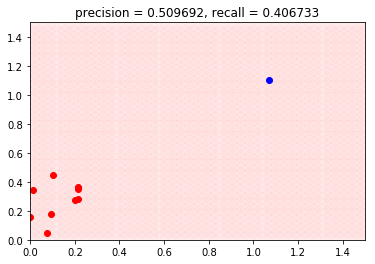

In [30]:
# Show the relationship between recall and precision for oversampling. Example for feature "Number" 
def plot_model_boundaries(model, xmin=0, xmax=1.5, ymin=0, ymax=1.5, npoints=40):
    xx = np.linspace(xmin, xmax, npoints)
    yy = np.linspace(ymin, ymax, npoints)
    xv, yv = np.meshgrid(xx, yy)
    xv, yv = xv.flatten(), yv.flatten()
    labels = model.predict(np.c_[xv,yv])
    plt.scatter(xv[labels==1],yv[labels==1],color='r', alpha=0.02, marker='o', s=300)
    plt.scatter(xv[labels==0],yv[labels==0],color='b', alpha=0.02, marker='o', s=300)
    plt.ylim([xmin, xmax])
    plt.xlim([ymin, ymax])
    
np.random.seed(1)
precision=0.509692
recall=0.406733
x = np.concatenate([np.zeros((8, 2)), np.zeros((1,2)), np.zeros((1,2))]) + precision*np.random.rand(10,2)
x[-1,0]+=1
x[-1,-1]+=1
y = np.concatenate([np.ones(9), np.zeros(1)])
log_model = linear_model.LogisticRegression(solver='lbfgs')
log_model.fit(x,y)
predicted_labels = log_model.predict(x)
plot_model_boundaries(log_model, xmin=0, xmax=1.5, ymin=0, ymax=1.5)
plt.scatter(x[y==0,0],x[y==0,1], color='b')
plt.scatter(x[y==1,0],x[y==1,1], color='r');
fpr, tpr, thresholds = roc_curve(y, predicted_labels)
plt.title("precision = {}, recall = {}".format(precision, recall));


# III. Decision tree

In [31]:
train, test = train_test_split(df, test_size=0.1, random_state=2)

features = ["Age", "Height", "Weight", "BMI", "Home", "Number"]

for feature in features:
    train_feature = pd.DataFrame(train[feature])
    test_feature = pd.DataFrame(test[feature])
    
    sm = SMOTE(random_state=2)
    train_feature, y_train_res = sm.fit_sample(train_feature, train['Medal'])

    # Train model
    medalTree = DecisionTreeClassifier(criterion = "gini", random_state = 3, max_depth=4, min_samples_leaf=1)
    medalTree.fit(train_feature, y_train_res)

    # To see the score of prediction
    preds = medalTree.predict(test_feature)
    df_metrics.at[feature,"Accuracy_decisionTree"] = accuracy_score(preds,test["Medal"])

    # Confusion matrix, can be used to calculate the accuracy of the model
    print(feature, "\n", pd.crosstab(preds,test['Medal']), "\n")
    
    # To see the recall of prediction
    confusion = pd.crosstab(preds,test['Medal'])
    print(len(confusion.index))
    if len(confusion.index) == 1:
        TP = 0
        FN = 0
        df_metrics.at[feature,"Recall_decisionTree"] = 0
    else:
        TP = confusion.at[1,1]
        FN = confusion.at[0,1]
        TN = confusion.at[0,0]
        FP = confusion.at[1,0]
        recall = TP / (TP+FN)
        precision = TP/(TP+FP)
        df_metrics.at[feature,"Recall_decisionTree"] = recall
        df_metrics.at[feature,"Precision_decisionTree"] = precision
                                 
                                      
# To see the probability of not having medal
total_train = train.loc[train.Medal == 0]["Medal"].count() + train.loc[train.Medal == 1]["Medal"].count()
lose_train = train.loc[train.Medal == 0]["Medal"].count()
total_test = test.loc[test.Medal == 0]["Medal"].count() + test.loc[test.Medal == 1]["Medal"].count()
lose_test = test.loc[test.Medal == 0]["Medal"].count()
print("P(Lose)(train): ", lose_train / total_train)
print("P(Lose)(test): ", lose_test / total_test)

# Show the mean accuracy of different models
df_metrics.sort_values(by=['Recall_decisionTree'], ascending=False)
df_metrics.sort_values(by=['Precision_decisionTree'], ascending=False)

Age 
 Medal     0    1
row_0           
0      4337  372
1      7170  727 

2
Height 
 Medal     0    1
row_0           
0      9016  775
1      2491  324 

2
Weight 
 Medal     0    1
row_0           
0      8803  745
1      2704  354 

2
BMI 
 Medal     0    1
row_0           
0      9268  798
1      2239  301 

2
Home 
 Medal      0     1
row_0             
0      10973  1022
1        534    77 

2
Number 
 Medal      0    1
row_0            
0      11078  652
1        429  447 

2
P(Lose)(train):  0.9113810245742693
P(Lose)(test):  0.9128192924004442


,Recall_imbalance,Accuracy_imbalance,Precision_imbalance,Accuracy_underSampling,Recall_underSampling,Precision_underSampling,Accuracy_overSampling,Recall_overSampling,Precision_overSampling,Accuracy_decisionTree,Recall_decisionTree,Precision_decisionTree
Number,0.0205656,0.903617,0.25,0.909567,0.360754,0.516564,0.914168,0.406733,0.509692,0.914247,0.406733,0.510274
Home,0,0.907425,NaN,0.873394,0.084833,0.157895,0.876567,0.070064,0.126023,0.876567,0.070064,0.126023
BMI,0,0.907425,NaN,0.674520,0.346187,0.107906,0.595431,0.468608,0.102365,0.759083,0.273885,0.118504
Weight,0,0.907425,NaN,0.630176,0.426735,0.110888,0.567428,0.515014,0.103172,0.726400,0.322111,0.115762
Height,0,0.907425,NaN,0.592734,0.451585,0.104959,0.537363,0.519563,0.097191,0.740917,0.294813,0.115098
Age,0,0.907425,NaN,0.727114,0.195373,0.083547,0.537918,0.524113,0.097993,0.401713,0.661510,0.092060


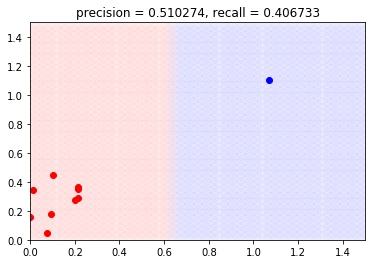

In [32]:
# Show the relationship between recall and precision for decision tree. Example for feature "Number"  

def plot_model_boundaries(model, xmin=0, xmax=1.5, ymin=0, ymax=1.5, npoints=40):
    xx = np.linspace(xmin, xmax, npoints)
    yy = np.linspace(ymin, ymax, npoints)
    xv, yv = np.meshgrid(xx, yy)
    xv, yv = xv.flatten(), yv.flatten()
    labels = model.predict(np.c_[xv,yv])
    plt.scatter(xv[labels==1],yv[labels==1],color='r', alpha=0.02, marker='o', s=300)
    plt.scatter(xv[labels==0],yv[labels==0],color='b', alpha=0.02, marker='o', s=300)
    plt.ylim([xmin, xmax])
    plt.xlim([ymin, ymax])
    
np.random.seed(1)
precision=0.510274
recall=0.406733
x = np.concatenate([np.zeros((8, 2)), np.zeros((1,2)), np.zeros((1,2))]) + precision*np.random.rand(10,2)
x[-1,0]+=1
x[-1,-1]+=1
y = np.concatenate([np.ones(9), np.zeros(1)])
medalTree = DecisionTreeClassifier(criterion = "gini", random_state = 3, max_depth=4, min_samples_leaf=1)
medalTree.fit(x,y)
predicted_labels = medalTree.predict(x)
plot_model_boundaries(medalTree, xmin=0, xmax=1.5, ymin=0, ymax=1.5)
plt.scatter(x[y==0,0],x[y==0,1], color='b')
plt.scatter(x[y==1,0],x[y==1,1], color='r');
fpr, tpr, thresholds = roc_curve(y, predicted_labels)
plt.title("precision = {}, recall = {}".format(precision, recall));

In [33]:
df_metrics[["Accuracy_imbalance", "Accuracy_underSampling", "Accuracy_overSampling", "Accuracy_decisionTree"]]

,Accuracy_imbalance,Accuracy_underSampling,Accuracy_overSampling,Accuracy_decisionTree
Age,0.907425,0.727114,0.537918,0.401713
Height,0.907425,0.592734,0.537363,0.740917
Weight,0.907425,0.630176,0.567428,0.726400
BMI,0.907425,0.674520,0.595431,0.759083
Home,0.907425,0.873394,0.876567,0.876567
Number,0.903617,0.909567,0.914168,0.914247


In [34]:
df_metrics[["Recall_imbalance", "Recall_underSampling", "Recall_overSampling", "Recall_decisionTree", "Precision_imbalance", "Precision_underSampling", "Precision_overSampling","Precision_decisionTree"]]

,Recall_imbalance,Recall_underSampling,Recall_overSampling,Recall_decisionTree,Precision_imbalance,Precision_underSampling,Precision_overSampling,Precision_decisionTree
Age,0,0.195373,0.524113,0.661510,NaN,0.083547,0.097993,0.092060
Height,0,0.451585,0.519563,0.294813,NaN,0.104959,0.097191,0.115098
Weight,0,0.426735,0.515014,0.322111,NaN,0.110888,0.103172,0.115762
BMI,0,0.346187,0.468608,0.273885,NaN,0.107906,0.102365,0.118504
Home,0,0.084833,0.070064,0.070064,NaN,0.157895,0.126023,0.126023
Number,0.0205656,0.360754,0.406733,0.406733,0.25,0.516564,0.509692,0.510274
